# Datavisualization of the data 



In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfTransformer

# Step 1: Define the folder path (Modify this if needed)
folder_path = "data/teacher_discourse_data"

# Step 2: Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Error: Directory '{folder_path}' does not exist. Please check the path.")
else:
    print(f"Directory '{folder_path}' found.\nListing available files...\n")

    # Step 3: List available files in the directory
    available_files = os.listdir(folder_path)
    print("Files in directory:", available_files)

    # Step 4: Categorize files into three lists
    corpus_files = glob.glob(os.path.join(folder_path, "*corpus_segm_unlemm_full.csv"))
    dfm_lemm_files = glob.glob(os.path.join(folder_path, "*dfm_segm_lemm_full.csv"))
    dfm_unlemm_files = glob.glob(os.path.join(folder_path, "*dfm_segm_unlemm_full.csv"))

    # Step 5: Load the files into Pandas DataFrames
    def load_files(file_list, description):
        """Loads CSV files from a list into a single DataFrame."""
        if file_list:
            print(f"Loading {description} ({len(file_list)} files)...")
            return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
        else:
            print(f"No files found for {description}.")
            return pd.DataFrame()  # Return empty DataFrame if no files

    df_corpus = load_files(corpus_files, "Corpus Data")
    df_dfm_lemm = load_files(dfm_lemm_files, "DFM Lemm Data")
    df_dfm_unlemm = load_files(dfm_unlemm_files, "DFM Unlemm Data")

    # Step 6: Display basic information about each dataset
    for name, df in zip(["Corpus Data", "DFM Lemm Data", "DFM Unlemm Data"],
                        [df_corpus, df_dfm_lemm, df_dfm_unlemm]):
        print(f"\n{name} Overview:")
        print(df.info())
        print(df.head())

    # Step 7: Save DataFrames for further analysis if needed
    df_corpus.to_csv("corpus_data_combined.csv", index=False)
    df_dfm_lemm.to_csv("dfm_lemm_data_combined.csv", index=False)
    df_dfm_unlemm.to_csv("dfm_unlemm_data_combined.csv", index=False)

    print("\nData loading complete. CSVs saved for reference.")


/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_27990/159475718.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Directory 'data/teacher_discourse_data' found.
Listing available files...

Files in directory: ['cl06_pr2_dfm_segm_lemm_full.csv', 'cl08_pr1_corpus_segm_unlemm_full.csv', 'cl01_pr1_dfm_segm_lemm_full.csv', 'cl01_pr2_corpus_segm_unlemm_full.csv', 'cl07_pr2_dfm_segm_unlemm_full.csv', 'cl04_pr2_corpus_segm_unlemm_full.csv', 'cl09_pr2_dfm_segm_unlemm_full.csv', 'cl03_pr1_dfm_segm_unlemm_full.csv', 'cl09_pr2_corpus_segm_unlemm_full.csv', 'cl04_pr2_dfm_segm_unlemm_full.csv', 'cl06_pr1_dfm_segm_lemm_full.csv', 'cl05_pr1_corpus_segm_unlemm_full.csv', 'cl01_pr2_dfm_segm_lemm_full.csv', 'cl03_pr1_corpus_segm_unlemm_full.csv', 'cl02_pr2_dfm_segm_unlemm_full.csv', 'cl08_pr1_dfm_segm_unlemm_full.csv', 'cl06_pr1_dfm_segm_unlemm_full.csv', 'cl06_pr1_corpus_segm_unlemm_full.csv', 'cl07_pr1_dfm_segm_lemm_full.csv', 'cl07_pr2_dfm_segm_lemm_full.csv', 'cl02_pr2_corpus_segm_unlemm_full.csv', 'cl05_pr1_dfm_segm_unlemm_full.csv', 'cl01_pr2_dfm_segm_unlemm_full.csv', 'cl07_pr2_corpus_segm_unlemm_full.csv', '

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_27990/159475718.py:33: DtypeWarning: Columns (1297) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_27990/159475718.py:33: DtypeWarning: Columns (1292) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_27990/159475718.py:33: DtypeWarning: Columns (1039) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_27990/159475718.py:33: DtypeWarning: Columns (1039) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv(f) 

In [12]:
df_corpus.columns

Index(['Unnamed: 0', 'doc_id', 'text', 'timestamp', 'statement_duration',
       'teacher_id', 'recipient', 'comment_didactic', 'comment_bugs',
       'time_slice', 'segment_source', 'class_id', 'pupils_number',
       'school_level', 'lesson_id', 'lesson_topic', 'programming_type',
       'number_of_teachers', 'discourse_id', 'teacher_intent',
       'role_in_project', 'gender', 'age_range', 'teaching_level',
       'number_of_disciplines', 'disciplines', 'teaching_experience',
       'teaching_experience_range', 'cs_teaching_experience',
       'cs_teaching_experience_range', 'teacher_degree', 'pre_or_in_service',
       'teacher_education_type', 'cs_education_institution',
       'cs_education_type', 'highest_diploma', 'TPACK_score_didactics',
       'TPACK_score_content'],
      dtype='object')

In [17]:
print(f"Unnamed: 0: {df_corpus['Unnamed: 0'].values}")
print(f"doc_id: {df_corpus['doc_id'].values}")
print(f"text: {df_corpus['text'].values}")
print(f"timestamp: {df_corpus['timestamp'].values}")
print(f"statement_duration: {df_corpus['statement_duration'].values}")
print(f"teacher_id: {df_corpus['teacher_id'].values}")
print(f"recipient: {df_corpus['recipient'].values}")
print(f"comment_didactic: {df_corpus['comment_didactic'].values}")
print(f"comment_bugs: {df_corpus['comment_bugs'].values}")
print(f"time_slice: {df_corpus['time_slice'].values}")
print(f"segment_source: {df_corpus['segment_source'].values}")
print(f"class_id: {df_corpus['class_id'].values}")
print(f"pupils_number: {df_corpus['pupils_number'].values}")
print(f"school_level: {df_corpus['school_level'].values}")
print(f"lesson_id: {df_corpus['lesson_id'].values}")
print(f"lesson_topic: {df_corpus['lesson_topic'].values}")
print(f"programming_type: {df_corpus['programming_type'].values}")
print(f"number_of_teachers: {df_corpus['number_of_teachers'].values}")
print(f"discourse_id: {df_corpus['discourse_id'].values}")
print(f"teacher_intent: {df_corpus['teacher_intent'].values}")
print(f"role_in_project: {df_corpus['role_in_project'].values}")
print(f"gender: {df_corpus['gender'].values}")
print(f"age_range: {df_corpus['age_range'].values}")
print(f"teaching_level: {df_corpus['teaching_level'].values}")
print(f"number_of_disciplines: {df_corpus['number_of_disciplines'].values}")
print(f"disciplines: {df_corpus['disciplines'].values}")
print(f"teaching_experience: {df_corpus['teaching_experience'].values}")
print(f"teaching_experience_range: {df_corpus['teaching_experience_range'].values}")
print(f"cs_teaching_experience: {df_corpus['cs_teaching_experience'].values}")
print(f"cs_teaching_experience_range: {df_corpus['cs_teaching_experience_range'].values}")
print(f"teacher_degree: {df_corpus['teacher_degree'].values}")
print(f"pre_or_in_service: {df_corpus['pre_or_in_service'].values}")
print(f"teacher_education_type: {df_corpus['teacher_education_type'].values}")
print(f"cs_education_institution: {df_corpus['cs_education_institution'].values}")
print(f"cs_education_type: {df_corpus['cs_education_type'].values}")
print(f"highest_diploma: {df_corpus['highest_diploma'].values}")
print(f"TPACK_score_didactics: {df_corpus['TPACK_score_didactics'].values}")
print(f"TPACK_score_content: {df_corpus['TPACK_score_content'].values}")

Unnamed: 0: [  1   2   3 ... 666 667 668]
doc_id: ['cl08_pr1_text1_1' 'cl08_pr1_text2_1' 'cl08_pr1_text3_1' ...
 'cl01_pr1_text633_1' 'cl01_pr1_text634_1' 'cl01_pr1_text635_1']
text: ["Alors bonjour à tous! Alors… on est là aujourd'hui avec nom_d_un_e_enseignant_e pour vous faire la séance 3… qui est sur… la programmation. Donc on va un peu vous initier à ce monde-là. Donc est-ce que vous savez ce que… qu'est-ce que c'est la programmation… déjà? Oui?"
 "Encore une! Ouais, ça, c'est l'avant-dernière. Donc qu'est ce que c'est la programmation? Oui?"
 "Ouais c'est un bon début. Quoi d'autre? Oui?" ...
 "Alors, euh… Je ne sais pas si peut être vous pourrez l'écrire quand vous serez en classe, mais c'est XLogoOnline… online, ça veut dire en ligne… mais X L O G O."
 'Je pense que sur Internet, sur le moteur de recherche, ça peut aller. Oui, Safari.'
 "Exactement. Alors voilà, si c'est bon, je pense, que vous pouvez y aller? Alors vous pouvez y aller!"]
timestamp: ['00:00:00' '00:00:20' '00:0

In [19]:
print(f"teacher_intent: {df_corpus['teacher_intent'].values}")



teacher_intent: [5 5 5 ... 1 1 1]


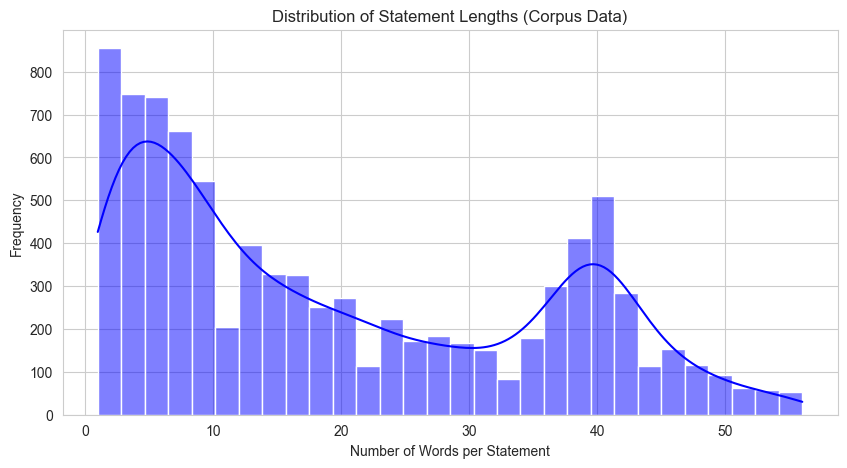

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_30801/1544452340.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis")


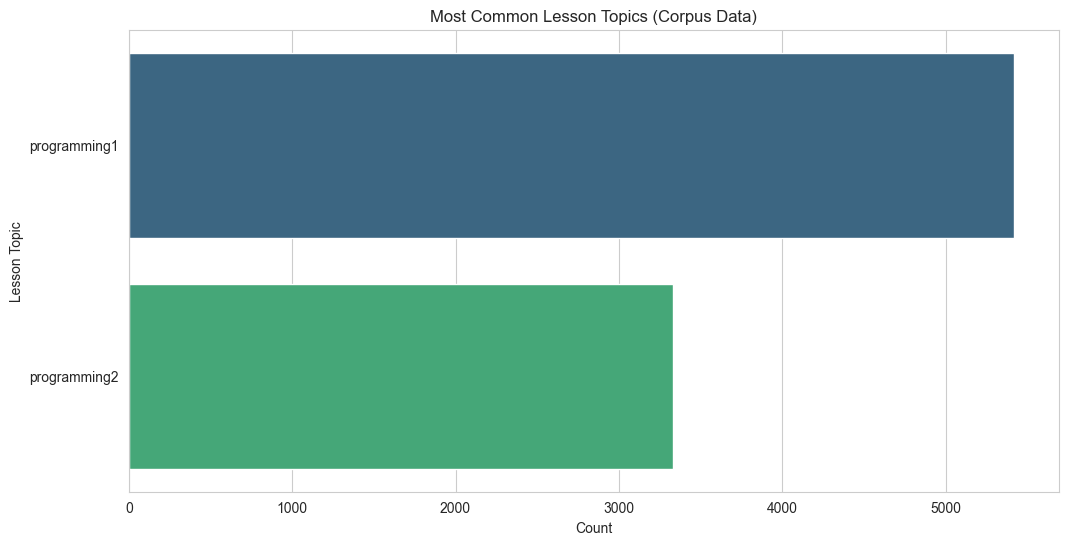

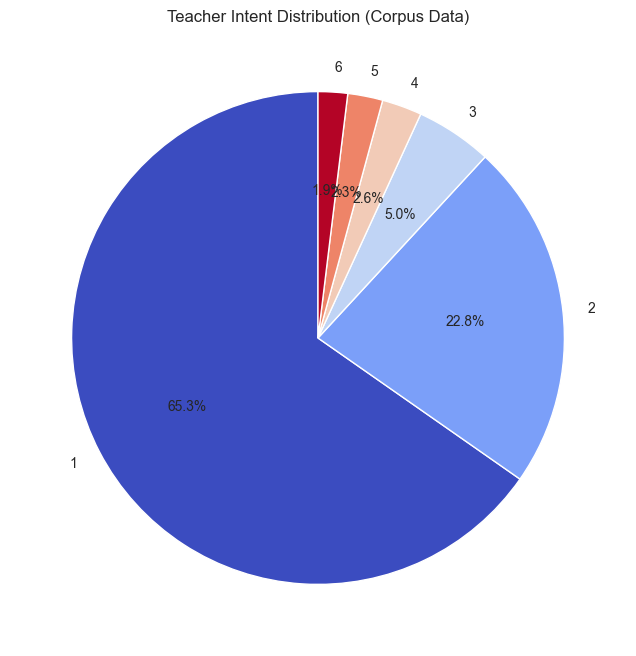

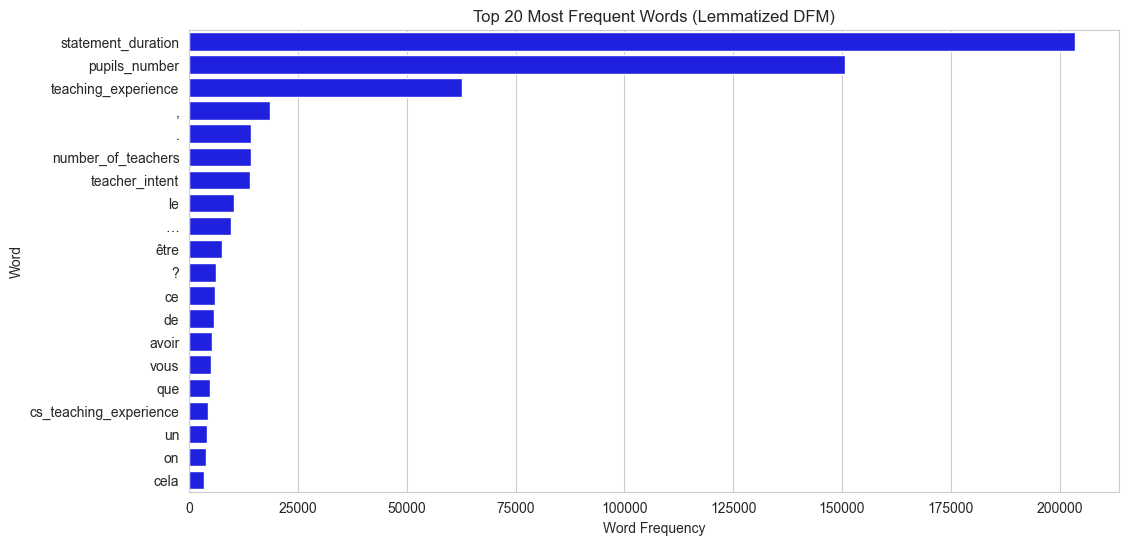

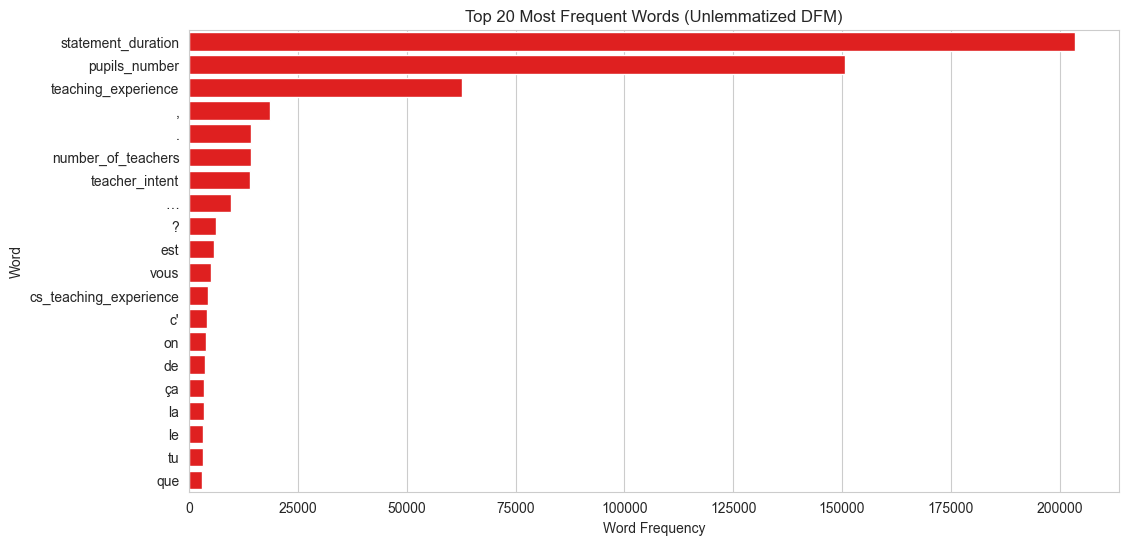

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_30801/1544452340.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tfidf.values, y=top_tfidf.index, palette="magma")


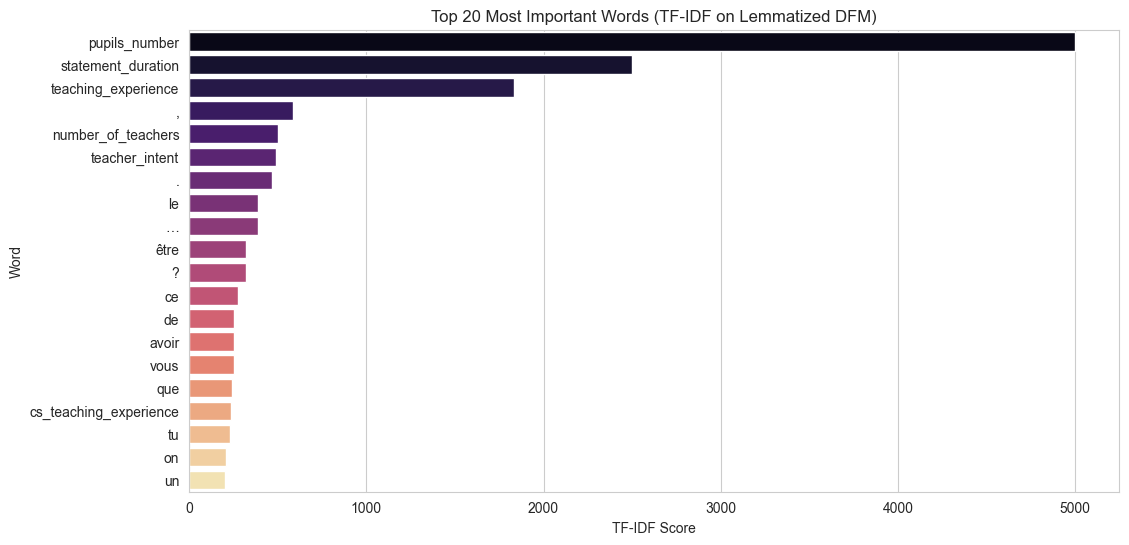

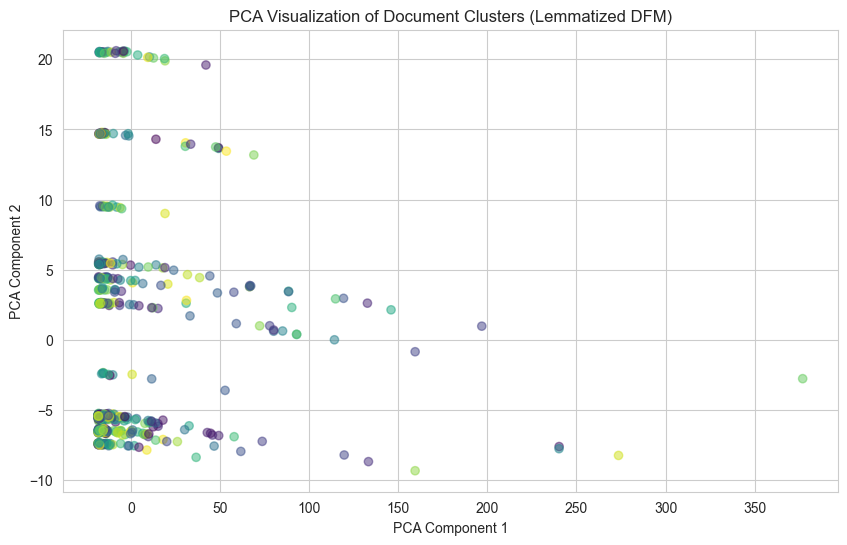

In [ ]:
if not df_corpus.empty:
    # (a) Text Length Distribution
    df_corpus["text_length"] = df_corpus["text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10, 5))
    sns.histplot(df_corpus["text_length"], bins=30, kde=True, color="blue")
    plt.xlabel("Number of Words per Statement")
    plt.ylabel("Frequency")
    plt.title("Distribution of Statement Lengths (Corpus Data)")
    plt.show()

    # (b) Most Common Topics (lesson_topic)
    plt.figure(figsize=(12, 6))
    topic_counts = df_corpus["lesson_topic"].value_counts()
    sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis")
    plt.xlabel("Count")
    plt.ylabel("Lesson Topic")
    plt.title("Most Common Lesson Topics (Corpus Data)")
    plt.show()

    # (c) Teacher Intent Distribution (pie chart)
    plt.figure(figsize=(8, 8))
    intent_counts = df_corpus["teacher_intent"].value_counts()
    intent_counts.plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
    plt.ylabel("")
    plt.title("Teacher Intent Distribution (Corpus Data)")
    plt.show()
else:
    print("Corpus Data is empty; skipping corpus visualizations.")

# =========================
# 3. Visualizations for DFM Data
# =========================

def plot_top_words(df, title, drop_cols=["Unnamed: 0", "doc_id"], top_n=20, color="blue"):
    """
    Compute and plot the top N words (by frequency) from a DFM DataFrame.
    Assumes all columns except drop_cols are numeric word counts.
    """
    # Drop non-feature columns
    df_features = df.drop(columns=drop_cols, errors="ignore")
    # Convert columns to numeric (coerce errors) and fill NaN with 0
    df_features = df_features.apply(pd.to_numeric, errors="coerce").fillna(0)
    # Sum counts for each word and get top N words
    word_freq = df_features.sum().sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=word_freq.values, y=word_freq.index, color=color)
    plt.xlabel("Word Frequency")
    plt.ylabel("Word")
    plt.title(title)
    plt.show()
    
# (a) Word Frequency in DFM Lemm Data
if not df_dfm_lemm.empty:
    plot_top_words(df_dfm_lemm, "Top 20 Most Frequent Words (Lemmatized DFM)", color="blue")
else:
    print("DFM Lemm Data is empty; skipping word frequency visualization.")

# (b) Word Frequency in DFM Unlemm Data
if not df_dfm_unlemm.empty:
    plot_top_words(df_dfm_unlemm, "Top 20 Most Frequent Words (Unlemmatized DFM)", color="red")
else:
    print("DFM Unlemm Data is empty; skipping word frequency visualization.")

# (c) TF-IDF Word Importance from DFM Lemm Data
if not df_dfm_lemm.empty:
    # Prepare the count matrix: drop unwanted columns and select only numeric columns
    df_counts = df_dfm_lemm.drop(columns=["Unnamed: 0", "doc_id"], errors="ignore")
    df_counts = df_counts.apply(pd.to_numeric, errors="coerce")
    # Retain only numeric columns (this will drop columns like timestamp if they exist)
    df_counts = df_counts.select_dtypes(include=[np.number]).fillna(0)
    
    transformer = TfidfTransformer(smooth_idf=True)
    tfidf_matrix = transformer.fit_transform(df_counts)
    # Sum TF-IDF scores over all documents and sort
    tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()
    tfidf_series = pd.Series(tfidf_scores, index=df_counts.columns)
    top_tfidf = tfidf_series.sort_values(ascending=False).head(20)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_tfidf.values, y=top_tfidf.index, palette="magma")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Word")
    plt.title("Top 20 Most Important Words (TF-IDF on Lemmatized DFM)")
    plt.show()
else:
    print("DFM Lemm Data is empty; skipping TF-IDF visualization.")

# (d) PCA for Dimensionality Reduction on DFM Lemm Data
if not df_dfm_lemm.empty:
    # Sample 500 rows for PCA
    sample_df = df_dfm_lemm.drop(columns=["Unnamed: 0", "doc_id"], errors="ignore").sample(n=500, random_state=42)
    sample_df = sample_df.apply(pd.to_numeric, errors="coerce").fillna(0)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(sample_df)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=np.random.rand(len(pca_result)), cmap="viridis")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("PCA Visualization of Document Clusters (Lemmatized DFM)")
    plt.show()
else:
    print("DFM Lemm Data is empty; skipping PCA visualization.")


Classification of statements into two gaussians would maybe be intressting to see. One long and one short. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 1. SAMPLE a subset of documents from your DFM
sample_size = 500
df_sample = df_dfm_lemm.sample(n=sample_size, random_state=42)

# 2. MERGE with metadata to get labels (teacher_id, lesson_topic)
#    Assuming df_corpus has columns ["doc_id", "teacher_id", "lesson_topic", ...]
meta_cols = ["doc_id", "teacher_id", "lesson_topic"]
df_meta = df_corpus[meta_cols].drop_duplicates()

# Join on doc_id so we have teacher_id and lesson_topic in the same DataFrame
df_merged = pd.merge(df_sample, df_meta, on="doc_id", how="left")

# 3. PREPARE the numeric matrix for PCA
drop_cols = ["Unnamed: 0", "doc_id", "teacher_id", "lesson_topic"]
df_counts = df_merged.drop(columns=drop_cols, errors="ignore").apply(pd.to_numeric, errors="coerce").fillna(0)

# 4. RUN PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_counts)
df_merged["PC1"] = pca_result[:, 0]
df_merged["PC2"] = pca_result[:, 1]

# 5. PLOT, coloring by teacher_id
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x="PC1", y="PC2", hue="teacher_id", palette="Set2")
plt.title("PCA by Teacher ID (Lemmatized DFM)")
plt.show()

# (Optional) If you want to color by lesson_topic:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x="PC1", y="PC2", hue="lesson_topic", palette="Set1")
plt.title("PCA by Lesson Topic (Lemmatized DFM)")
plt.show()


ValueError: Could not interpret value `teacher_id` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

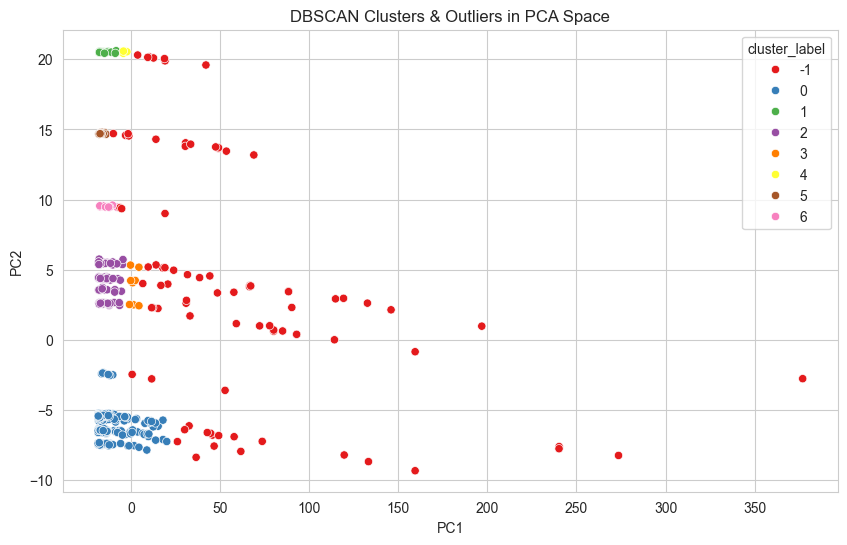

Number of outliers: 86


KeyError: "['teacher_id', 'lesson_topic'] not in index"

In [23]:
from sklearn.cluster import DBSCAN

# Use the same df_merged from above
X = df_merged[["PC1", "PC2"]]

# DBSCAN parameters:
#  - eps: the max distance for points to be considered neighbors
#  - min_samples: the minimum number of neighbors to form a dense region
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X)
df_merged["cluster_label"] = labels

# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_merged, 
    x="PC1", y="PC2", 
    hue="cluster_label", 
    palette="Set1"
)
plt.title("DBSCAN Clusters & Outliers in PCA Space")
plt.show()

# Documents with label = -1 are typically considered outliers
outliers = df_merged[df_merged["cluster_label"] == -1]
print("Number of outliers:", len(outliers))
print(outliers[["doc_id", "teacher_id", "lesson_topic", "PC1", "PC2"]])

# 1. Extract the outlier doc_ids
outlier_ids = outliers["doc_id"].unique()

# 2. Filter df_corpus to only those outlier documents
outlier_texts = df_corpus[df_corpus["doc_id"].isin(outlier_ids)]

# 3. Print the text (or other columns) for each outlier
print(outlier_texts[["doc_id", "text"]])



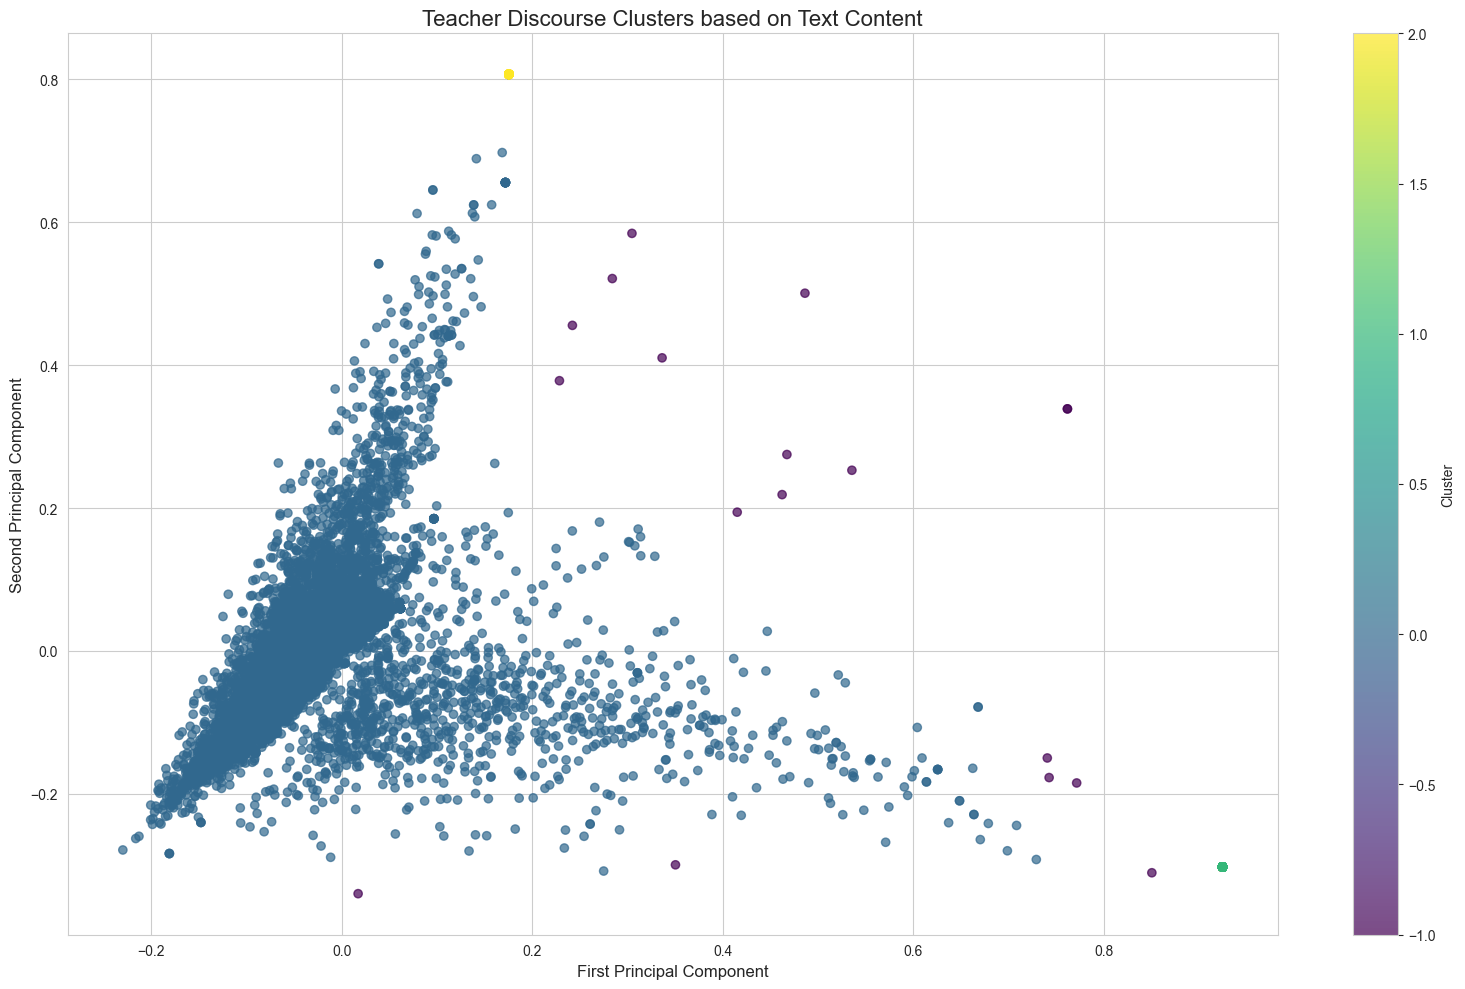


--- Cluster Analysis ---
Cluster Distribution:
cluster
 0    8551
 1     112
 2      70
-1      18
Name: count, dtype: int64

Programming Type Distribution per Cluster:
programming_type   textual    visual
cluster                             
-1                0.611111  0.388889
 0                0.622266  0.377734
 1                0.491071  0.508929
 2                0.628571  0.371429

--- Top Terms in Each Cluster ---

Cluster 0 Top Terms:
['est', 'vous', 'ça', 'tu', 'la', 'le', 'il', 'que', 'pas', 'et']

Cluster 1 Top Terms:
['oui', 'loulou']

Cluster -1 Top Terms:
['ouais', 'oui', 'ah', 'est', 'tu', 'peux', 'vous', 'avez', 'qu', 'ce']

Cluster 2 Top Terms:
['ouais', 'télécommandées', 'ph', 'essaye', 'crée', '5g', 'tip']

--- Outlier Cluster (-1) Details ---
Number of outliers: 18

Outlier Cluster Programming Types:
programming_type
textual    0.611111
visual     0.388889
Name: proportion, dtype: float64

Outlier Cluster School Levels:


<Figure size 1200x600 with 0 Axes>

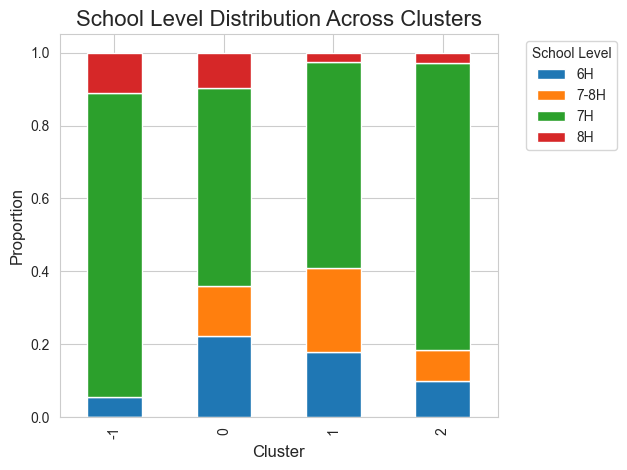

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Preprocessing and Feature Extraction
# Use TF-IDF Vectorization on the text data
vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit to top 1000 features
    stop_words='english',
    max_df=0.95,  # Ignore terms that appear in more than 95% of documents
    min_df=2  # Ignore terms that appear in less than 2 documents
)

# Vectorize the text
tfidf_matrix = vectorizer.fit_transform(df_corpus['text'])

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame with PCA features
df_pca = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2']
)

# Add metadata to PCA DataFrame
df_pca['teacher_id'] = df_corpus['teacher_id']
df_pca['lesson_topic'] = df_corpus['lesson_topic']
df_pca['programming_type'] = df_corpus['programming_type']
df_pca['school_level'] = df_corpus['school_level']

# DBSCAN Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_features)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_pca['cluster'] = dbscan.fit_predict(X_scaled)

# Visualization 1: Clustering Visualization
plt.figure(figsize=(16, 10))
scatter = plt.scatter(
    df_pca['PC1'], 
    df_pca['PC2'], 
    c=df_pca['cluster'], 
    cmap='viridis', 
    alpha=0.7
)
plt.title('Teacher Discourse Clusters based on Text Content', fontsize=16)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Additional Insights
print("\n--- Cluster Analysis ---")
cluster_counts = df_pca['cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

# Analyze clusters by programming type
cluster_programming_type = pd.crosstab(
    df_pca['cluster'], 
    df_pca['programming_type'], 
    normalize='index'
)
print("\nProgramming Type Distribution per Cluster:")
print(cluster_programming_type)

def get_top_terms_for_cluster(cluster_num, n_terms=10):
    # Get documents in this cluster
    cluster_docs = df_corpus[df_pca['cluster'] == cluster_num]['text']
    
    # Vectorize cluster documents
    cluster_vectorizer = TfidfVectorizer(
        stop_words='english',  # Changed to French stop words
        max_features=n_terms
    )
    cluster_tfidf = cluster_vectorizer.fit_transform(cluster_docs)
    
    # Get feature names and their mean TF-IDF scores
    feature_names = cluster_vectorizer.get_feature_names_out()
    tfidf_means = cluster_tfidf.toarray().mean(axis=0)
    
    # Sort and return top terms
    top_terms_indices = tfidf_means.argsort()[-n_terms:][::-1]
    return [feature_names[i] for i in top_terms_indices]

# Print top terms for each cluster, including -1
print("\n--- Top Terms in Each Cluster ---")
for cluster in df_pca['cluster'].unique():
    print(f"\nCluster {cluster} Top Terms:")
    print(get_top_terms_for_cluster(cluster))

# Additional analysis for the outlier cluster
outlier_cluster = df_pca[df_pca['cluster'] == -1]
print("\n--- Outlier Cluster (-1) Details ---")
print("Number of outliers:", len(outlier_cluster))
print("\nOutlier Cluster Programming Types:")
print(outlier_cluster['programming_type'].value_counts(normalize=True))
print("\nOutlier Cluster School Levels:")

# Visualization 2: School Level Distribution
plt.figure(figsize=(12, 6))
school_level_cluster = pd.crosstab(
    df_pca['cluster'], 
    df_pca['school_level'], 
    normalize='index'
)
school_level_cluster.plot(kind='bar', stacked=True)
plt.title('School Level Distribution Across Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='School Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dimensionality Reduction:

This is a visualization of teacher discourse data using Principal Component Analysis (PCA)
The x-axis represents the First Principal Component (PC1)
The y-axis represents the Second Principal Component (PC2)
Each point represents a segment of teacher discourse

Clustering:

The colors represent different clusters identified by the DBSCAN algorithm
Most points are blue, indicating a large, primary cluster
There are fewer points in other colors (purple, yellow, green), representing smaller or distinct clusters

Data Distribution:

The majority of discourse segments are concentrated in the central and left regions of the plot
There's a triangular or fan-like spread of blue points, suggesting variation in discourse content
Outlier or distinctly different discourse segments are scattered around the edges

Interpretation of Clusters:

The blue cluster likely represents the most common type of teacher discourse
Purple and other colored points might represent:

Unique teaching approaches
Different lesson topics
Distinct communication styles
Specialized or unusual discourse segments

Dimensionality Meaning:

PC1 and PC2 are synthetic dimensions that capture the most significant variations in the text data
Points closer together have more similar linguistic characteristics
Points further apart have more distinct linguistic features

Spread and Variation:

The wide spread suggests significant diversity in teacher discourse
The concentration of blue points indicates a core, typical way of communicating

In [44]:
!python -m spacy download fr_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.8/571.8 MB 9.4 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_lg')


Top Entities by Type:

LOC Entities:
FD: 70
OK: 44
B: 40
A: 34
Tourner: 32
AltGr: 30
nom_d_un_e_enseignant_e: 27
Heum: 25
heum: 21
Hop: 13

MISC Entities:
Ça: 530
Ok: 252
Repeat: 114
Heu: 100
RT 90: 99
CS: 82
Ah!: 78
iPad: 63
OK: 62
LT: 61

PER Entities:
Hein: 57
Hm hm: 34
Ben: 17
César: 15
Jeanne: 15
bravo: 12
hm hm: 12
Haha: 10
Bravo: 10
M: 7

ORG Entities:
FD: 70
BK: 57
RT: 52
FD 100: 44
Forward: 20
LT: 20
Yes: 17
Heum: 14
Top: 13
Back: 12


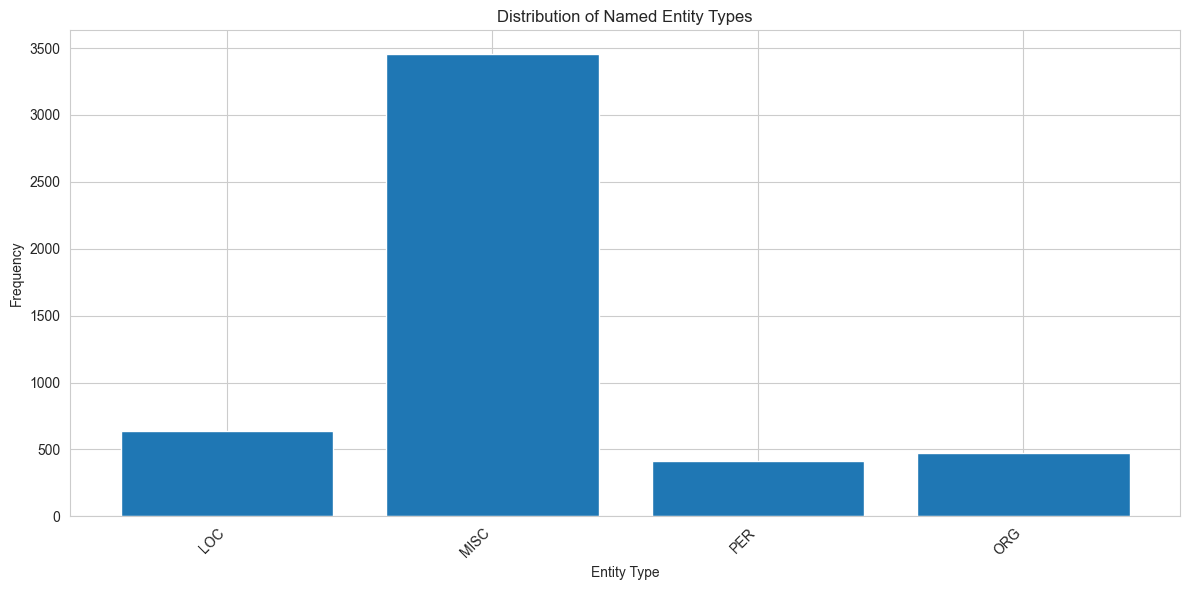

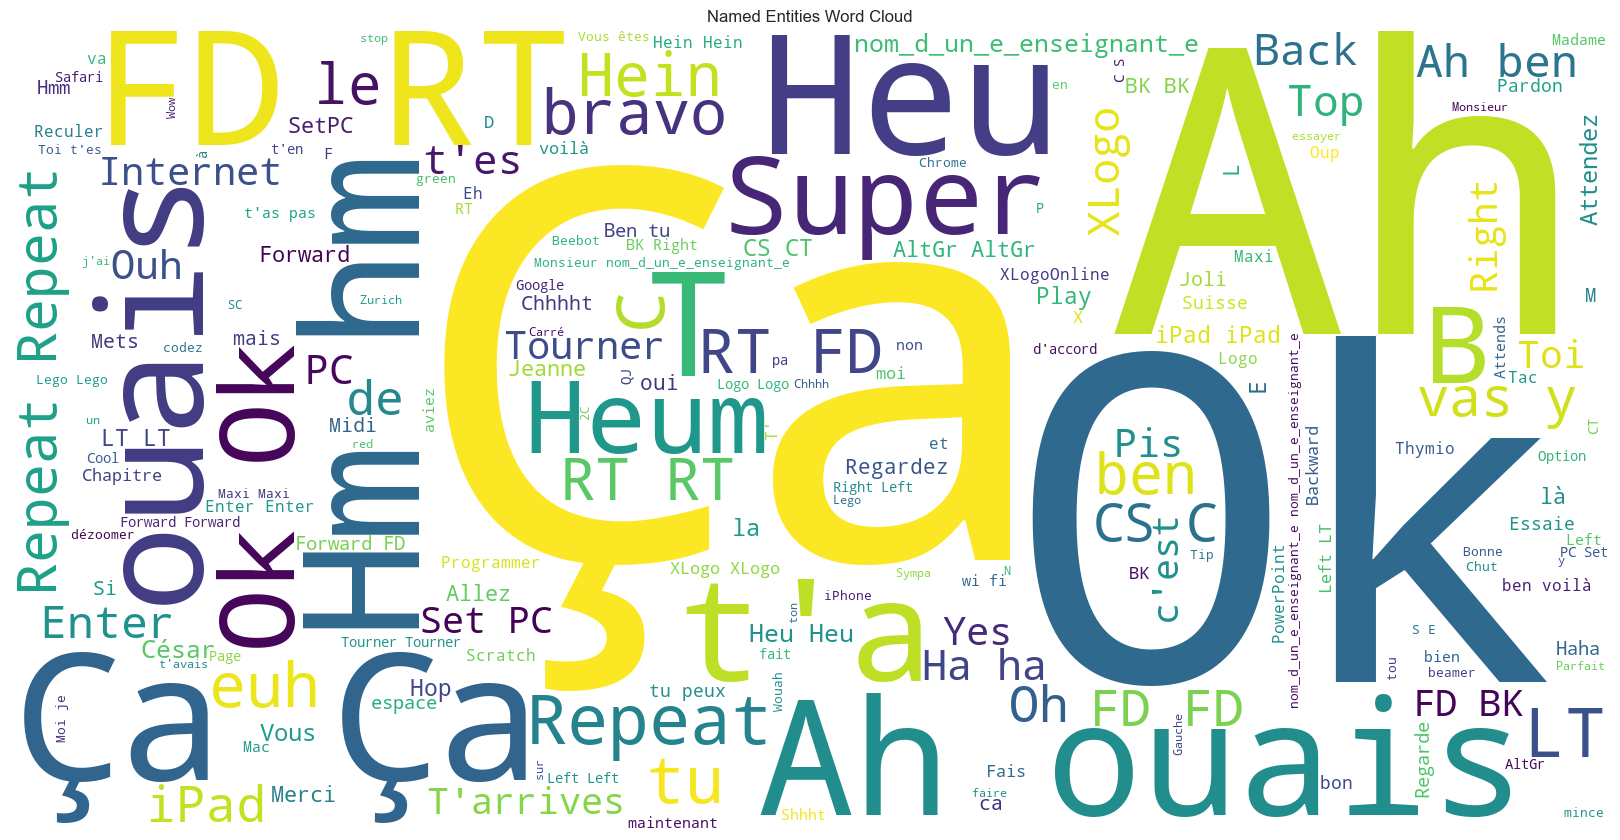


Top Entities by lesson_topic:

lesson_topic: programming1
('Ça', 'MISC'): 309
('Ok', 'MISC'): 94
('iPad', 'MISC'): 53
('Repeat', 'MISC'): 52
('Heu', 'MISC'): 49

lesson_topic: programming2
('Ça', 'MISC'): 221
('Ok', 'MISC'): 158
('Repeat', 'MISC'): 62
('RT 90', 'MISC'): 55
('Heu', 'MISC'): 51

Top Entities by programming_type:

programming_type: textual
('Ça', 'MISC'): 350
('Ok', 'MISC'): 169
('Repeat', 'MISC'): 108
('RT 90', 'MISC'): 87
('Heu', 'MISC'): 79

programming_type: visual
('Ça', 'MISC'): 180
('Ok', 'MISC'): 83
('iPad', 'MISC'): 40
('Ah!', 'MISC'): 28
('Super', 'MISC'): 28

Named entities exported to named_entities.csv


In [45]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the French language model
try:
    nlp = spacy.load("fr_core_news_lg")
except OSError:
    print("French model not found. Please install using:")
    print("python -m spacy download fr_core_news_sm")
    # Fallback to a generic model if French model is not available
    nlp = spacy.load("xx_ent_wiki_sm")

# Function to perform NER on a text
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER to the entire corpus
df_corpus['named_entities'] = df_corpus['text'].apply(extract_entities)

# Flatten the list of named entities
all_entities = [entity for entities in df_corpus['named_entities'] for entity in entities]

# Count and analyze entities
entity_counts = Counter(all_entities)

# Separate entities by type
entity_by_type = {}
for (entity, label) in all_entities:
    if label not in entity_by_type:
        entity_by_type[label] = []
    entity_by_type[label].append(entity)

# Top 10 entities by type
print("Top Entities by Type:")
for label, entities in entity_by_type.items():
    print(f"\n{label} Entities:")
    top_entities = Counter(entities).most_common(10)
    for entity, count in top_entities:
        print(f"{entity}: {count}")

# Visualization of Entity Types
plt.figure(figsize=(12, 6))
entity_type_counts = Counter([label for _, label in all_entities])
plt.bar(entity_type_counts.keys(), entity_type_counts.values())
plt.title('Distribution of Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Word Cloud of Entities
from wordcloud import WordCloud

# Combine all entities into a single string
entity_text = ' '.join([entity for entity, _ in all_entities])

# Generate Word Cloud
plt.figure(figsize=(16,10))
wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color='white', 
    min_font_size=10
).generate(entity_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Named Entities Word Cloud')
plt.tight_layout(pad=0)
plt.show()

# Analyze entities by teacher or lesson characteristics
def analyze_entities_by_characteristic(characteristic):
    entity_by_char = {}
    for _, row in df_corpus.iterrows():
        char_value = row[characteristic]
        entities = row['named_entities']
        
        if char_value not in entity_by_char:
            entity_by_char[char_value] = []
        entity_by_char[char_value].extend(entities)
    
    print(f"\nTop Entities by {characteristic}:")
    for char_value, entities in list(entity_by_char.items())[:5]:  # Limit to first 5 for brevity
        print(f"\n{characteristic}: {char_value}")
        top_entities = Counter(entities).most_common(5)
        for entity, count in top_entities:
            print(f"{entity}: {count}")

# Analyze entities by different characteristics
analyze_entities_by_characteristic('lesson_topic')
analyze_entities_by_characteristic('programming_type')

# Export entities to CSV for further analysis
entities_df = pd.DataFrame(all_entities, columns=['Entity', 'Type'])
entities_df.to_csv('named_entities.csv', index=False)
print("\nNamed entities exported to named_entities.csv")

In [81]:
import spacy
import pandas as pd
import re
from collections import Counter
import numpy as np

def advanced_entity_extraction(df_corpus):
    """
    Advanced entity extraction with multiple strategies
    """
    # Custom stopwords and noise removal
    french_stopwords = {
        'le', 'la', 'les', 'un', 'une', 'des', 'de', 'du', 'à', 'au', 'aux', 
        'et', 'ou', 'mais', 'donc', 'car', 'ni', 'je', 'tu', 'il', 'elle', 
        'nous', 'vous', 'ils', 'elles', 'ce', 'cet', 'cette', 'ces', 
        'mon', 'ton', 'son', 'notre', 'votre', 'leur', 'oui', 'non', 
        'est', 'sont', 'a', 'ai', 'as', 'avons', 'avez', 'ont', 
        'qui', 'que', 'quoi', 'dont', 'où', 'comment', 'pourquoi'
    }
    
    # Preprocessing function
    def preprocess_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and digits
        text = re.sub(r'[^a-zà-ÿ\s]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    # Custom entity extraction strategies
    def extract_potential_entities(text):
        # Preprocessing
        cleaned_text = preprocess_text(text)
        
        # Split into words
        words = cleaned_text.split()
        
        # Filter out stopwords and very short words
        potential_entities = [
            word for word in words 
            if word not in french_stopwords 
            and len(word) > 2
            and not word.isdigit()
        ]
        
        return potential_entities
    
    # Apply extraction to entire corpus
    all_potential_entities = []
    for text in df_corpus['text']:
        all_potential_entities.extend(extract_potential_entities(text))
    
    # Count and analyze entities
    entity_counts = Counter(all_potential_entities)
    
    # Top entities
    print("Top Potential Meaningful Entities:")
    for entity, count in entity_counts.most_common(20):
        print(f"{entity}: {count}")
    
    # Optional: Context-based entity filtering
    def is_likely_named_entity(entity, count):
        # Heuristics to filter more meaningful entities
        return (
            count > 2 and  # Appears more than twice
            len(entity) > 2 and  # More than 2 characters
            entity[0].isupper()  # Starts with capital letter
        )
    
    likely_named_entities = {
        entity: count for entity, count in entity_counts.items()
        if is_likely_named_entity(entity, count)
    }
    
    print("\nLikely Named Entities:")
    for entity, count in sorted(likely_named_entities.items(), key=lambda x: x[1], reverse=True)[:15]:
        print(f"{entity}: {count}")
    
    return likely_named_entities

# Run advanced entity extraction
advanced_entities = advanced_entity_extraction(df_corpus)

Top Potential Meaningful Entities:
cest: 3880
pas: 2274
faire: 1698
alors: 1584
ouais: 1476
fait: 1438
pour: 1415
euh: 978
nomduneélève: 973
tout: 875
bien: 862
sur: 834
ici: 821
hein: 807
comme: 748
quon: 738
avec: 732
fois: 729
juste: 717
voilà: 677

Likely Named Entities:


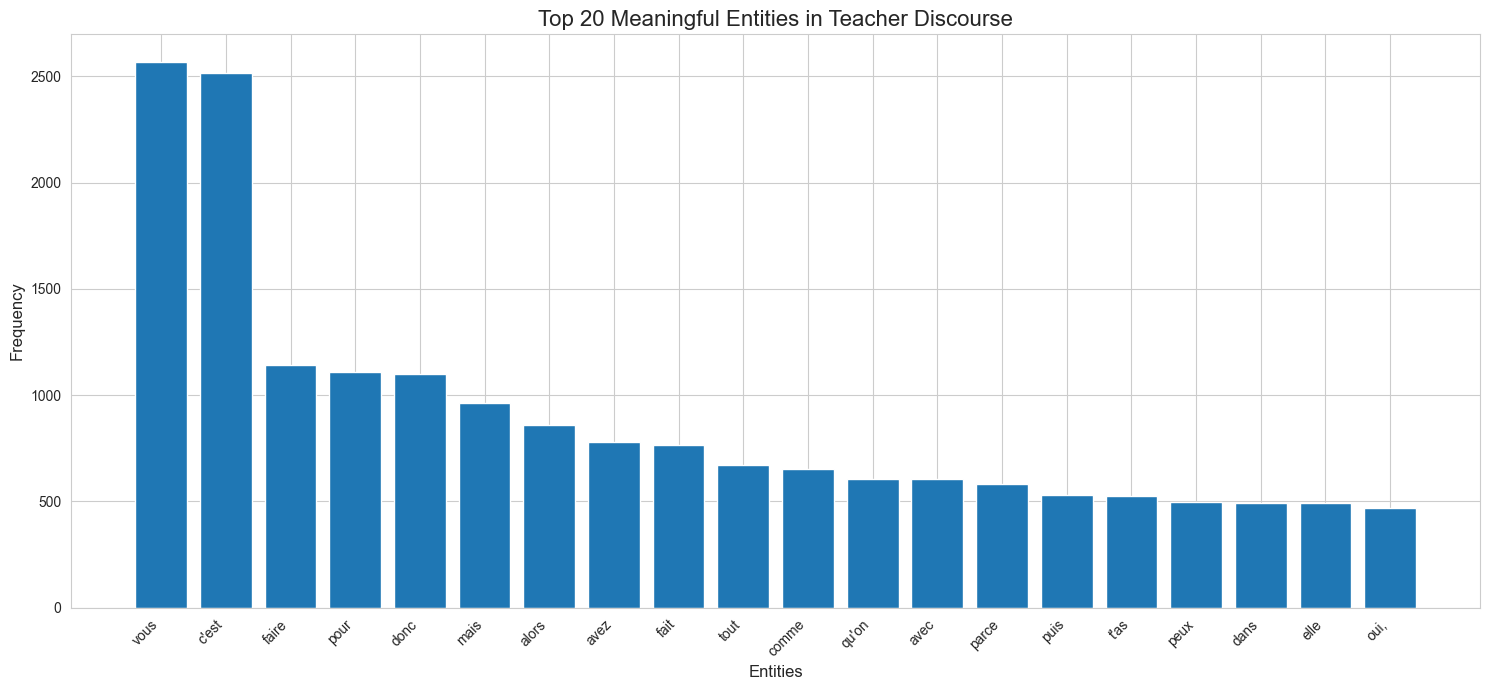

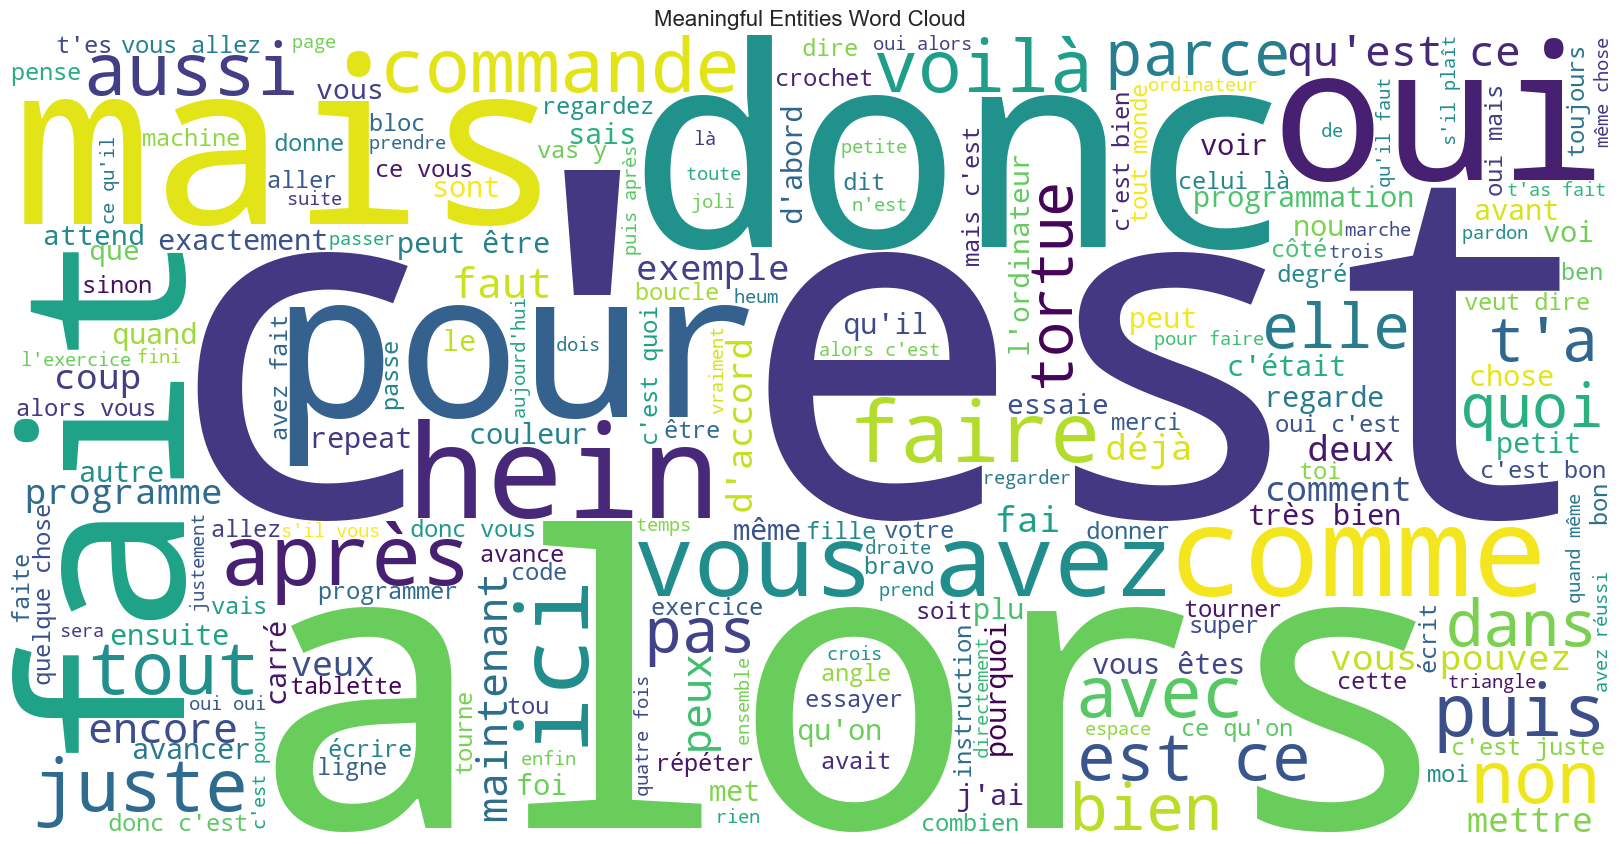


Top Entities by lesson_topic:

lesson_topic: programming1
c'est: 1523
vous: 1332
faire: 631
donc: 602
mais: 590

lesson_topic: programming2
vous: 1237
c'est: 993
pour: 542
faire: 509
donc: 498

Top Entities by programming_type:

programming_type: textual
vous: 1906
c'est: 1673
pour: 821
faire: 759
donc: 736

programming_type: visual
c'est: 843
vous: 663
faire: 381
donc: 364
mais: 303

Meaningful entities exported to meaningful_entities.csv

Top 50 Meaningful Entities:
vous: 2569
c'est: 2516
faire: 1140
pour: 1108
donc: 1100
mais: 964
alors: 861
avez: 782
fait: 767
tout: 673
comme: 652
qu'on: 608
avec: 605
parce: 584
puis: 531
t'as: 528
peux: 497
dans: 495
elle: 494
oui,: 468
oui?: 460
faut: 439
non,: 430
qu'il: 424
plus: 397
quand: 389
pouvez: 389
juste: 387
alors,: 383
est-ce: 373
peut: 336
bien: 333
même: 333
mettre: 328
très: 307
petit: 304
comment: 302
qu'est-ce: 298
hein.: 297
déjà: 295
ici,: 292
dire: 287
fait,: 281
fois: 273
hein,: 271
voilà.: 270
c'est…: 265
après: 265
quoi?: 

In [36]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the French language model
try:
    nlp = spacy.load("fr_core_news_md")
except OSError:
    print("French model not found. Please install using:")
    print("python -m spacy download fr_core_news_md")
    nlp = spacy.load("xx_ent_wiki_sm")

# Custom function to clean and extract meaningful entities
def extract_meaningful_entities(text):
    # Remove common filler words and noise
    cleaned_text = re.sub(r'\b(ouais|heu|ça|ok|ah|euh|nom_d_un_e_élève)\b', '', text.lower())
    
    # Split into words and remove very short or very long tokens
    words = [word.strip() for word in cleaned_text.split() 
             if 3 < len(word.strip()) < 20 
             and not word.isdigit()]
    
    # Remove duplicates while preserving order
    unique_words = []
    for word in words:
        if word not in unique_words:
            unique_words.append(word)
    
    return unique_words

# Apply custom entity extraction
df_corpus['meaningful_entities'] = df_corpus['text'].apply(extract_meaningful_entities)

# Flatten the list of entities
all_entities = [entity for entities in df_corpus['meaningful_entities'] for entity in entities]

# Count entities
entity_counts = Counter(all_entities)

# Visualization of Top Entities
plt.figure(figsize=(15, 7))
top_entities = entity_counts.most_common(20)
entities, counts = zip(*top_entities)

plt.bar(entities, counts)
plt.title('Top 20 Meaningful Entities in Teacher Discourse', fontsize=16)
plt.xlabel('Entities', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze entities by characteristics
def analyze_entities_by_characteristic(characteristic):
    entity_by_char = {}
    for _, row in df_corpus.iterrows():
        char_value = row[characteristic]
        entities = row['meaningful_entities']
        
        if char_value not in entity_by_char:
            entity_by_char[char_value] = []
        entity_by_char[char_value].extend(entities)
    
    print(f"\nTop Entities by {characteristic}:")
    for char_value, entities in list(entity_by_char.items())[:5]:
        print(f"\n{characteristic}: {char_value}")
        top_entities = Counter(entities).most_common(5)
        for entity, count in top_entities:
            print(f"{entity}: {count}")

# Word Cloud of Entities
from wordcloud import WordCloud

# Generate Word Cloud
plt.figure(figsize=(16,10))
wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color='white', 
    min_font_size=10
).generate(' '.join(all_entities))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Meaningful Entities Word Cloud', fontsize=16)
plt.tight_layout(pad=0)
plt.show()

# Analyze entities by different characteristics
analyze_entities_by_characteristic('lesson_topic')
analyze_entities_by_characteristic('programming_type')

# Export entities to CSV
entities_df = pd.DataFrame(all_entities, columns=['Entity'])
entities_df.to_csv('meaningful_entities.csv', index=False)
print("\nMeaningful entities exported to meaningful_entities.csv")

# Print top 50 entities
print("\nTop 50 Meaningful Entities:")
for entity, count in entity_counts.most_common(50):
    print(f"{entity}: {count}")

In [ ]:
import nltk
from nltk.corpus import stopwords
import spacy
import numpy as np

# Method 1: Using NLTK French Stopwords
nltk.download('stopwords')
french_stopwords_nltk = set(stopwords.words('french'))

# Updated CountVectorizer with French stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Choose one of the stopwords methods
vectorizer = CountVectorizer(
    max_df=0.95, 
    min_df=2, 
    stop_words=list(french_stopwords_nltk)  # or french_stopwords_spacy or custom_french_stopwords
)

# Your existing LDA code
doc_term_matrix = vectorizer.fit_transform(df_corpus['text'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(doc_term_matrix)

# Visualize and print top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_ind = topic.argsort()[:-10 - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    print(f"Topic {topic_idx}: {top_features}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tijuana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: ['ouais', 'tout', 'alors', 'bien', 'fait', 'ça', 'quoi', 'euh', 'ici', 'oui']
Topic 1: ['non', 'ouais', 'ah', 'ça', 'voilà', 'bien', 'oui', 'hein', 'ben', 'faut']
Topic 2: ['là', 'ça', 'alors', 'nom_d_un_e_élève', 'si', 'ok', 'plus', 'ah', 'peux', 'faire']
Topic 3: ['ça', 'donc', 'va', 'fait', 'faire', '100', 'nom_d_un_e_élève', 'comme', 'alors', 'euh']
Topic 4: ['faire', 'oui', 'va', 'tourner', 'carré', 'fait', 'donc', 'droite', 'tourne', 'fois']


In [51]:
!pip install textblob_fr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.2/561.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 4.4 MB/s eta 0:00:00


# Sentiment analysis 

In [60]:
!pip install pattern.text.fr

ERROR: Could not find a version that satisfies the requirement pattern.text.fr (from versions: none)
ERROR: No matching distribution found for pattern.text.fr


In [ ]:


from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

df_corpus['sentiment'] = df_corpus['text'].apply(get_sentiment)
# Analyze sentiment by different characteristics
print(df_corpus.groupby('programming_type')['sentiment'].mean())
print(df_corpus.groupby('school_level')['sentiment'].mean())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tijuana/nltk_data...


programming_type
textual    0.009189
visual     0.031370
Name: sentiment, dtype: float64
school_level
6H      0.004679
7-8H    0.023936
7H      0.020218
8H      0.023235
Name: sentiment, dtype: float64


6H: 0.004679 (very slightly positive, almost neutral)
7-8H: 0.023936 (more noticeably positive)
7H: 0.020218 (more noticeably positive)
8H: 0.023235 (more noticeably positive)


Visual programming texts seem to have a more positive sentiment compared to textual programming
Higher school levels (7H, 8H) have slightly more positive sentiment in their texts
All scores are relatively close to zero, suggesting mostly neutral to mildly positive sentiments

Sentiment scores typically range from -1 to 1
Negative values indicate negative sentiment
Positive values indicate positive sentiment
Values close to 0 suggest neutral sentiment

Hypothesis for sentiment analysis, what will influence the sentiment of the text?

write statements with supervisor here:


# TODO

# Textcomplexity analysis

In [69]:
import pandas as pd
import textstat

def analyze_text_complexity(text):
    """
    Analyze the complexity of a given text using multiple readability metrics.
    
    Args:
        text (str): The input text to analyze
    
    Returns:
        dict: A dictionary containing various readability scores
    """
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'coleman_liau_index': textstat.coleman_liau_index(text),
        'automated_readability_index': textstat.automated_readability_index(text)
    }

def complexity_analysis(df):
    """
    Perform comprehensive text complexity analysis on a DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame containing a 'text' column
    
    Returns:
        tuple: DataFrames with complexity analysis by programming type and school level
    """
    # Apply complexity analysis to the text column
    df['text_complexity'] = df['text'].apply(analyze_text_complexity)
    
    # Unpack complexity metrics into separate columns for easier analysis
    complexity_metrics = ['flesch_reading_ease', 'flesch_kincaid_grade', 
                          'gunning_fog', 'coleman_liau_index', 
                          'automated_readability_index']
    
    for metric in complexity_metrics:
        df[f'{metric}_score'] = df['text_complexity'].apply(lambda x: x[metric])
    
    # Analyze complexity by different dimensions
    complexity_by_programming_type = df.groupby('programming_type')[
        [f'{metric}_score' for metric in complexity_metrics]
    ].mean()
    
    complexity_by_school_level = df.groupby('school_level')[
        [f'{metric}_score' for metric in complexity_metrics]
    ].mean()
    
    return complexity_by_programming_type, complexity_by_school_level

# Example usage (commented out)

programming_complexity, school_complexity = complexity_analysis(df_corpus)
print(programming_complexity)
print(school_complexity)

                  flesch_reading_ease_score  flesch_kincaid_grade_score  \
programming_type                                                          
textual                           91.851132                    2.779948   
visual                            92.496163                    2.356717   

                  gunning_fog_score  coleman_liau_index_score  \
programming_type                                                
textual                    5.209698                  3.723780   
visual                     4.713407                  1.692449   

                  automated_readability_index_score  
programming_type                                     
textual                                    5.653931  
visual                                     4.493554  
              flesch_reading_ease_score  flesch_kincaid_grade_score  \
school_level                                                          
6H                            89.124940                    3.225039   
7-8H     

# Linguistic feature extraction 

In [71]:
import spacy

# Load French language model
nlp = spacy.load('fr_core_news_md')

def extract_linguistic_features(text):
    doc = nlp(text)
    return {
        'num_sentences': len(list(doc.sents)),
        'num_tokens': len(doc),
        'num_nouns': len([token for token in doc if token.pos_ == 'NOUN']),
        'num_verbs': len([token for token in doc if token.pos_ == 'VERB']),
        'avg_word_length': sum(len(token.text) for token in doc) / len(doc)
    }

df_corpus['linguistic_features'] = df_corpus['text'].apply(extract_linguistic_features)

print(df_corpus['linguistic_features'].head())

0    {'num_sentences': 6, 'num_tokens': 61, 'num_no...
1    {'num_sentences': 3, 'num_tokens': 24, 'num_no...
2    {'num_sentences': 4, 'num_tokens': 13, 'num_no...
3    {'num_sentences': 1, 'num_tokens': 12, 'num_no...
4    {'num_sentences': 4, 'num_tokens': 25, 'num_no...
Name: linguistic_features, dtype: object


In [72]:
import pandas as pd

# Convert dictionary column into separate columns
df_features = df_corpus['linguistic_features'].apply(pd.Series)

# Merge with original data (if needed)
df_corpus = pd.concat([df_corpus, df_features], axis=1)

# Show first rows
print(df_corpus.head())


   Unnamed: 0            doc_id  \
0           1  cl08_pr1_text1_1   
1           2  cl08_pr1_text2_1   
2           3  cl08_pr1_text3_1   
3           4  cl08_pr1_text4_1   
4           5  cl08_pr1_text5_1   

                                                text timestamp  \
0  Alors bonjour à tous! Alors… on est là aujourd...  00:00:00   
1  Encore une! Ouais, ça, c'est l'avant-dernière....  00:00:20   
2       Ouais c'est un bon début. Quoi d'autre? Oui?  00:00:35   
3  Tu crées le début mais tu crées quoi sur l'ord...  00:00:44   
4  Le programme… et puis il va servir à quoi ce p...  00:00:50   

   statement_duration teacher_id recipient comment_didactic comment_bugs  \
0              17.819  teacher01     class              NaN          NaN   
1               6.037  teacher01     class              NaN          NaN   
2               2.112  teacher01     class              NaN          NaN   
3               2.279  teacher01     class              NaN          NaN   
4           

# Time Series Discourse Analysis

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_30801/561520864.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.Grouper(key='timestamp', freq='10T'),  # 10-minute intervals


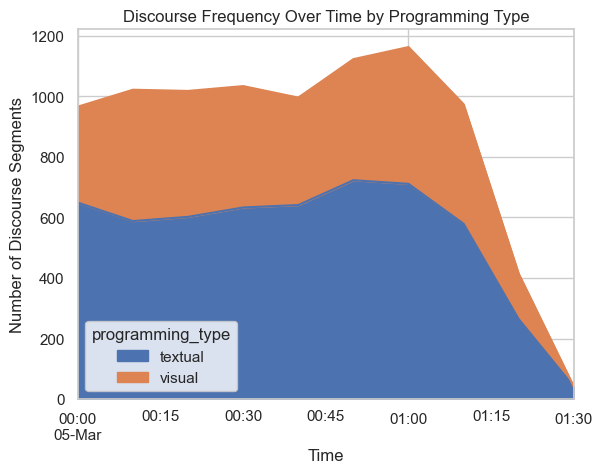

In [75]:
# Convert timestamp to datetime
df_corpus['timestamp'] = pd.to_datetime(df_corpus['timestamp'])

# Analyze discourse over time
time_based_analysis = df_corpus.groupby([
    pd.Grouper(key='timestamp', freq='10T'),  # 10-minute intervals
    'programming_type'
])['text'].count().unstack()

# Visualize
time_based_analysis.plot(kind='area', stacked=True)
plt.title('Discourse Frequency Over Time by Programming Type')
plt.xlabel('Time')
plt.ylabel('Number of Discourse Segments')
plt.show()

# Transition analysis 

In [76]:
def analyze_conversation_transitions(df):
    # Sort by timestamp within each lesson
    df_sorted = df.sort_values(['lesson_id', 'timestamp'])
    
    # Track speaker changes
    df_sorted['speaker_change'] = df_sorted['teacher_id'] != df_sorted['teacher_id'].shift()
    
    # Analyze transition patterns
    transition_stats = df_sorted.groupby('lesson_id')['speaker_change'].mean()
    
    return transition_stats

conversation_transitions = analyze_conversation_transitions(df_corpus)

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_30801/3199597365.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transition_stats.index, y=transition_stats.values,


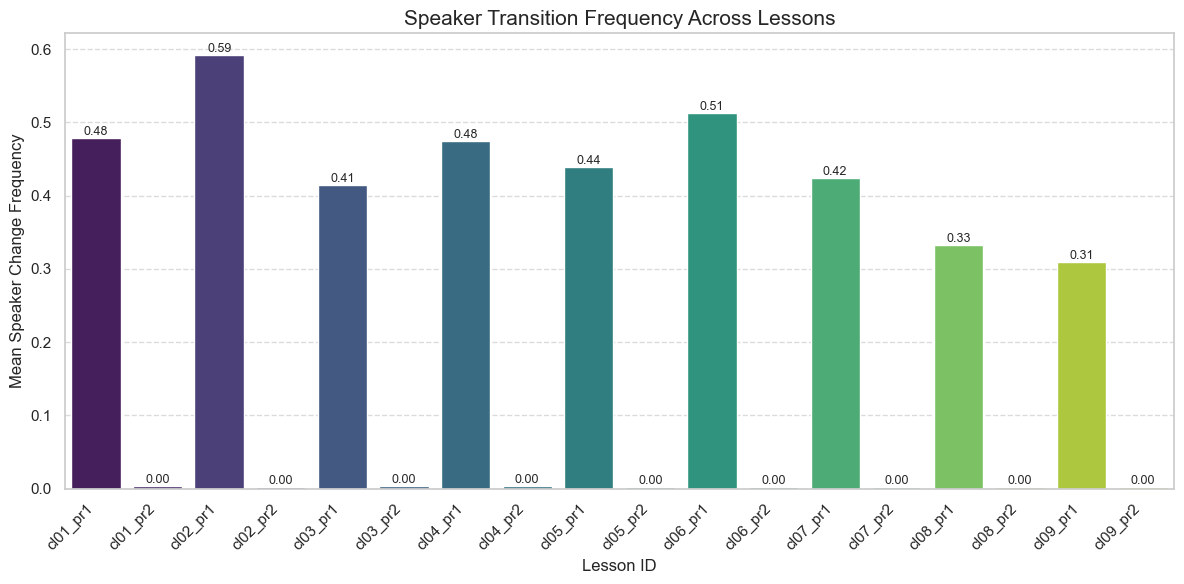

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_conversation_transitions(transition_stats):
    """
    Create a bar plot to visualize conversation transition frequencies across lessons.
    
    Parameters:
    transition_stats (pd.Series): Series with lesson_id as index and mean speaker changes as values
    """
    plt.figure(figsize=(12, 6))
    
    # Create bar plot
    sns.barplot(x=transition_stats.index, y=transition_stats.values, 
                palette='viridis')
    
    plt.title('Speaker Transition Frequency Across Lessons', fontsize=15)
    plt.xlabel('Lesson ID', fontsize=12)
    plt.ylabel('Mean Speaker Change Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add horizontal grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate bars with exact values
    for i, v in enumerate(transition_stats.values):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Visualize the transitions
visualize_conversation_transitions(conversation_transitions)

In [78]:
import pandas as pd
import numpy as np

def diagnose_speaker_transitions(df):
    """
    Diagnose potential reasons for zero speaker transitions
    
    Parameters:
    df (pandas.DataFrame): Original conversation dataframe
    
    Returns:
    Dictionary with diagnostic information
    """
    diagnostics = {
        'total_lessons': df['lesson_id'].nunique(),
        'lesson_details': {}
    }
    
    for lesson in df['lesson_id'].unique():
        lesson_data = df[df['lesson_id'] == lesson]
        
        # Check unique teachers
        unique_teachers = lesson_data['teacher_id'].nunique()
        
        # Check total entries
        total_entries = len(lesson_data)
        
        # Check speaker changes
        speaker_changes = (lesson_data['teacher_id'] != lesson_data['teacher_id'].shift()).sum()
        
        diagnostics['lesson_details'][lesson] = {
            'total_entries': total_entries,
            'unique_teachers': unique_teachers,
            'unique_teacher_ids': list(lesson_data['teacher_id'].unique()),
            'calculated_speaker_changes': speaker_changes
        }
    
    return diagnostics

# Run diagnostic
diagnostic_results = diagnose_speaker_transitions(df_corpus)

# Print results in a readable format
for lesson, details in diagnostic_results['lesson_details'].items():
    print(f"Lesson: {lesson}")
    print(f"  Total Entries: {details['total_entries']}")
    print(f"  Unique Teachers: {details['unique_teachers']}")
    print(f"  Teacher IDs: {details['unique_teacher_ids']}")
    print(f"  Calculated Speaker Changes: {details['calculated_speaker_changes']}")
    print("-" * 40)

Lesson: cl08_pr1
  Total Entries: 487
  Unique Teachers: 2
  Teacher IDs: ['teacher01', 'teacher06']
  Calculated Speaker Changes: 162
----------------------------------------
Lesson: cl01_pr2
  Total Entries: 295
  Unique Teachers: 1
  Teacher IDs: ['teacher08']
  Calculated Speaker Changes: 1
----------------------------------------
Lesson: cl04_pr2
  Total Entries: 250
  Unique Teachers: 1
  Teacher IDs: ['teacher11']
  Calculated Speaker Changes: 1
----------------------------------------
Lesson: cl09_pr2
  Total Entries: 403
  Unique Teachers: 1
  Teacher IDs: ['teacher16']
  Calculated Speaker Changes: 1
----------------------------------------
Lesson: cl05_pr1
  Total Entries: 693
  Unique Teachers: 2
  Teacher IDs: ['teacher06', 'teacher05']
  Calculated Speaker Changes: 304
----------------------------------------
Lesson: cl03_pr1
  Total Entries: 629
  Unique Teachers: 2
  Teacher IDs: ['teacher04', 'teacher03']
  Calculated Speaker Changes: 261
------------------------------

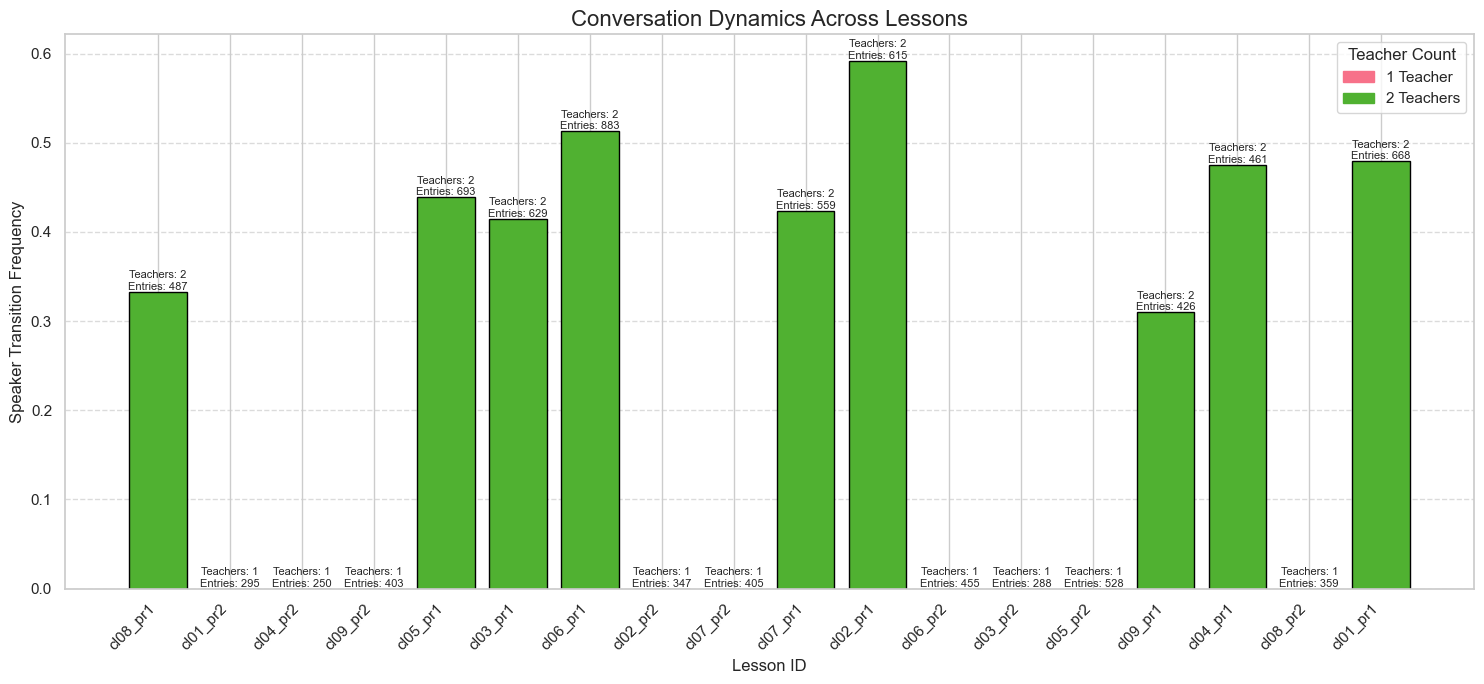

lesson_id  unique_teachers  total_entries  speaker_changes  transition_frequency          teacher_ids
 cl08_pr1                2            487              162              0.332649 teacher01, teacher06
 cl01_pr2                1            295                1              0.000000            teacher08
 cl04_pr2                1            250                1              0.000000            teacher11
 cl09_pr2                1            403                1              0.000000            teacher16
 cl05_pr1                2            693              304              0.438672 teacher06, teacher05
 cl03_pr1                2            629              261              0.414944 teacher04, teacher03
 cl06_pr1                2            883              453              0.513024 teacher07, teacher03
 cl02_pr2                1            347                1              0.000000            teacher09
 cl07_pr2                1            405                1              0.000000  

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def advanced_conversation_transitions(df):
    """
    Provide a more comprehensive analysis of conversation transitions
    
    Parameters:
    df (pandas.DataFrame): Conversation dataframe
    
    Returns:
    pandas.DataFrame: Detailed transition statistics
    """
    # Prepare results DataFrame
    transition_analysis = []
    
    for lesson in df['lesson_id'].unique():
        lesson_data = df[df['lesson_id'] == lesson]
        
        # Number of unique teachers
        unique_teachers = lesson_data['teacher_id'].nunique()
        
        # Total entries in the lesson
        total_entries = len(lesson_data)
        
        # Calculate speaker changes
        speaker_changes = (lesson_data['teacher_id'] != lesson_data['teacher_id'].shift()).sum()
        
        # Calculate transition frequency
        transition_frequency = speaker_changes / total_entries if unique_teachers > 1 else 0
        
        # Identify teachers
        teacher_ids = list(lesson_data['teacher_id'].unique())
        
        transition_analysis.append({
            'lesson_id': lesson,
            'unique_teachers': unique_teachers,
            'total_entries': total_entries,
            'speaker_changes': speaker_changes,
            'transition_frequency': transition_frequency,
            'teacher_ids': ', '.join(teacher_ids)
        })
    
    return pd.DataFrame(transition_analysis)

# Perform analysis
transition_df = advanced_conversation_transitions(df_corpus)

# Visualization
plt.figure(figsize=(15, 7))

# Color palette based on number of teachers
colors = sns.color_palette("husl", n_colors=3)
color_map = {1: colors[0], 2: colors[1], 3: colors[2]}

# Create bar plot
plt.bar(
    transition_df['lesson_id'], 
    transition_df['transition_frequency'],
    color=[color_map.get(teachers, colors[2]) for teachers in transition_df['unique_teachers']],
    edgecolor='black',
    linewidth=1
)

plt.title('Conversation Dynamics Across Lessons', fontsize=16)
plt.xlabel('Lesson ID', fontsize=12)
plt.ylabel('Speaker Transition Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with additional information
for i, row in transition_df.iterrows():
    plt.text(
        i, row['transition_frequency'], 
        f"Teachers: {row['unique_teachers']}\nEntries: {row['total_entries']}", 
        ha='center', 
        va='bottom', 
        fontsize=8
    )

plt.tight_layout()

# Add a color legend
legend_elements = [
    plt.Rectangle((0,0),1,1, color=colors[0], label='1 Teacher'),
    plt.Rectangle((0,0),1,1, color=colors[1], label='2 Teachers'),
]
plt.legend(handles=legend_elements, title='Teacher Count', loc='upper right')

plt.show()

# Print detailed analysis
print(transition_df.to_string(index=False))